# Chapter 1: Machine Learning Fundamentals

This notebook explains the core concepts of Machine Learning:
- **Classification vs Regression** - Two goals of ML
- **Training vs Testing Data** - How to build and evaluate models honestly
- **Overfitting** - Why models sometimes memorize instead of learn
- **Data Types** - Understanding features and variables

Let's explore each concept with simple, practical examples!

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 2. The Two Main Goals of Machine Learning

### Goal 1: **Classification** 
Predicts which **category** something belongs to (Yes/No, Cat/Dog, Like/Dislike)

### Goal 2: **Regression**
Predicts a **number** (height, price, temperature)

Let's create two datasets to demonstrate each:

CLASSIFICATION EXAMPLE

📺 Predicting: Will this person like a movie?
   Input: Movie complexity score (1-10)
   Output: Yes (1) or No (0)

REGRESSION EXAMPLE

📏 Predicting: How tall is someone?
   Input: Height of their parent (cm)
   Output: Their height (cm)



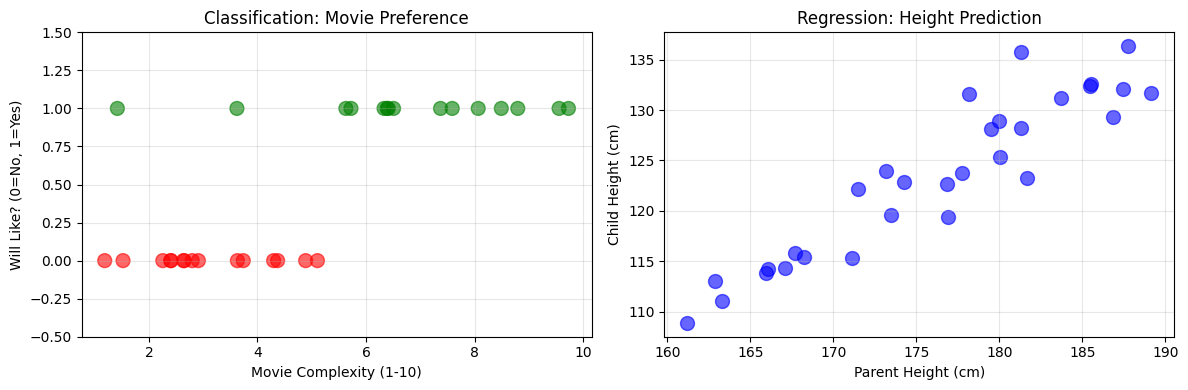

In [2]:
print("="*60)
print("CLASSIFICATION EXAMPLE")
print("="*60)
print("\n📺 Predicting: Will this person like a movie?")
print("   Input: Movie complexity score (1-10)")
print("   Output: Yes (1) or No (0)\n")

# Create classification dataset
np.random.seed(42)
X_class = np.random.uniform(1, 10, 30).reshape(-1, 1)
y_class = (X_class.flatten() > 5).astype(int)
# Add some noise
y_class[np.random.choice(30, 5, replace=False)] = 1 - y_class[np.random.choice(30, 5, replace=False)]

# Plot classification
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
colors = ['red' if y == 0 else 'green' for y in y_class]
plt.scatter(X_class, y_class, c=colors, s=100, alpha=0.6)
plt.xlabel('Movie Complexity (1-10)')
plt.ylabel('Will Like? (0=No, 1=Yes)')
plt.title('Classification: Movie Preference')
plt.ylim(-0.5, 1.5)
plt.grid(True, alpha=0.3)

print("="*60)
print("REGRESSION EXAMPLE")
print("="*60)
print("\n📏 Predicting: How tall is someone?")
print("   Input: Height of their parent (cm)")
print("   Output: Their height (cm)\n")

# Create regression dataset
X_reg = np.random.uniform(160, 190, 30).reshape(-1, 1)
y_reg = X_reg.flatten() * 0.7 + np.random.normal(0, 3, 30)

# Plot regression
plt.subplot(1, 2, 2)
plt.scatter(X_reg, y_reg, s=100, alpha=0.6, color='blue')
plt.xlabel('Parent Height (cm)')
plt.ylabel('Child Height (cm)')
plt.title('Regression: Height Prediction')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Training vs Testing Data

The key rule: **Never judge a model only by how well it fits Training Data!**

A model should be evaluated on **new, unseen Testing Data**.

Let's split our regression data and compare:

SPLITTING DATA INTO TRAINING & TESTING

Training samples: 21
Testing samples: 9

Linear Model Performance:
  Training Error (RMSE): 2.47 cm
  Testing Error (RMSE):  3.48 cm

✅ The model generalizes well! (similar errors)



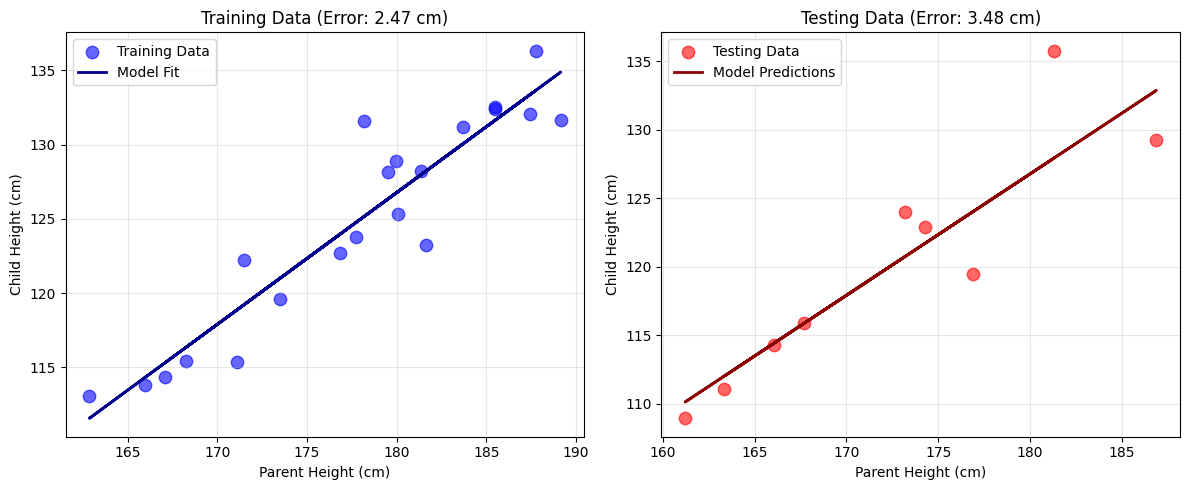

In [3]:
print("SPLITTING DATA INTO TRAINING & TESTING\n")

# Split regression data: 70% train, 30% test
split_idx = int(0.7 * len(X_reg))
X_train, X_test = X_reg[:split_idx], X_reg[split_idx:]
y_train, y_test = y_reg[:split_idx], y_reg[split_idx:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}\n")

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Calculate errors
train_error = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_error = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Linear Model Performance:")
print(f"  Training Error (RMSE): {train_error:.2f} cm")
print(f"  Testing Error (RMSE):  {test_error:.2f} cm")
print(f"\n✅ The model generalizes well! (similar errors)\n")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, s=80, alpha=0.6, color='blue', label='Training Data')
plt.plot(X_train, y_pred_train, color='darkblue', linewidth=2, label='Model Fit')
plt.xlabel('Parent Height (cm)')
plt.ylabel('Child Height (cm)')
plt.title(f'Training Data (Error: {train_error:.2f} cm)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, s=80, alpha=0.6, color='red', label='Testing Data')
plt.plot(X_test, y_pred_test, color='darkred', linewidth=2, label='Model Predictions')
plt.xlabel('Parent Height (cm)')
plt.ylabel('Child Height (cm)')
plt.title(f'Testing Data (Error: {test_error:.2f} cm)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Overfitting: When Models Memorize Instead of Learn

**Overfitting** = A model fits Training Data perfectly but fails on Testing Data

Think of it like **memorizing answers to a practice test** instead of learning the concepts.

DEMONSTRATING OVERFITTING

Comparing: Simple Linear Model vs Complex Polynomial Model

📊 LINEAR MODEL (Simple - Black Line):
   Training Error: 2.47 cm
   Testing Error:  3.48 cm
   Difference: 1.01 cm (consistent)

📊 POLYNOMIAL MODEL (Complex - Green Squiggle):
   Training Error: 2.39 cm
   Testing Error:  3.62 cm
   Difference: 1.23 cm ⚠️  OVERFITTING!

⚠️  WHAT'S HAPPENING:
   The polynomial model fits training data perfectly (2.39)
   But fails on new data (3.62)
   It memorized the training set, not the general pattern!



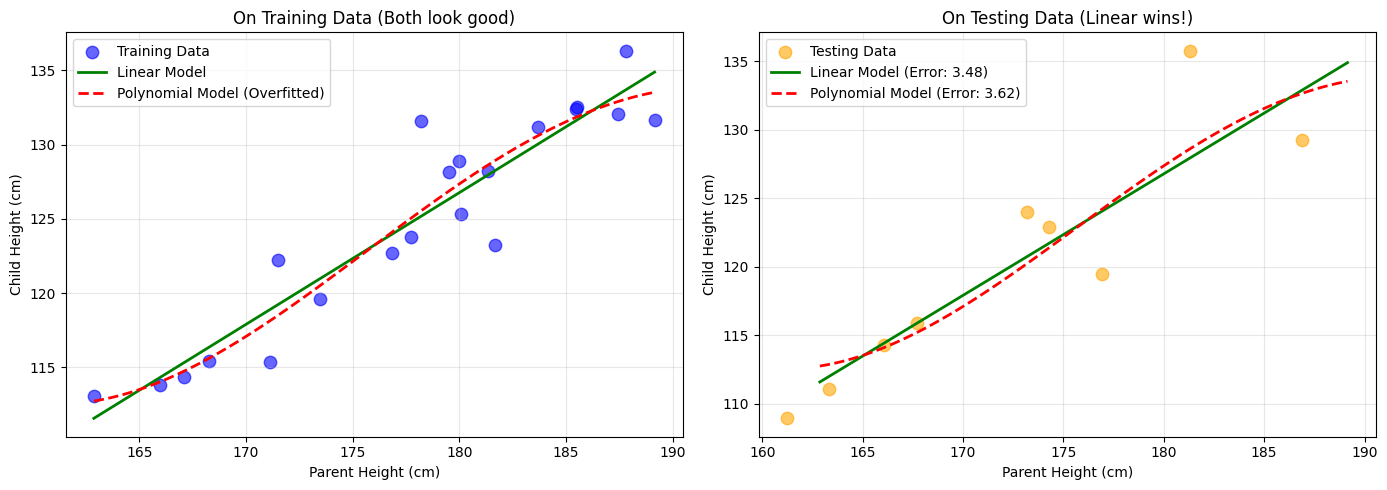

✅ LESSON: Simple models often generalize better than complex ones!


In [4]:
print("DEMONSTRATING OVERFITTING\n")
print("Comparing: Simple Linear Model vs Complex Polynomial Model\n")

# Train both models
linear = LinearRegression()
linear.fit(X_train, y_train)

poly_features = PolynomialFeatures(degree=8)  # Very complex!
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly = LinearRegression()
poly.fit(X_train_poly, y_train)

# Evaluate on both training and testing data
linear_train_error = np.sqrt(mean_squared_error(y_train, linear.predict(X_train)))
linear_test_error = np.sqrt(mean_squared_error(y_test, linear.predict(X_test)))

poly_train_error = np.sqrt(mean_squared_error(y_train, poly.predict(X_train_poly)))
poly_test_error = np.sqrt(mean_squared_error(y_test, poly.predict(X_test_poly)))

print("📊 LINEAR MODEL (Simple - Black Line):")
print(f"   Training Error: {linear_train_error:.2f} cm")
print(f"   Testing Error:  {linear_test_error:.2f} cm")
print(f"   Difference: {abs(linear_train_error - linear_test_error):.2f} cm (consistent)\n")

print("📊 POLYNOMIAL MODEL (Complex - Green Squiggle):")
print(f"   Training Error: {poly_train_error:.2f} cm")
print(f"   Testing Error:  {poly_test_error:.2f} cm")
print(f"   Difference: {abs(poly_train_error - poly_test_error):.2f} cm ⚠️  OVERFITTING!\n")

print("⚠️  WHAT'S HAPPENING:")
print(f"   The polynomial model fits training data perfectly ({poly_train_error:.2f})")
print(f"   But fails on new data ({poly_test_error:.2f})")
print(f"   It memorized the training set, not the general pattern!\n")

# Visualize
X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

y_plot_linear = linear.predict(X_plot)
y_plot_poly = poly.predict(X_plot_poly)

plt.figure(figsize=(14, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, s=80, alpha=0.6, color='blue', label='Training Data')
plt.plot(X_plot, y_plot_linear, color='green', linewidth=2, label='Linear Model')
plt.plot(X_plot, y_plot_poly, color='red', linewidth=2, linestyle='--', label='Polynomial Model (Overfitted)')
plt.xlabel('Parent Height (cm)')
plt.ylabel('Child Height (cm)')
plt.title('On Training Data (Both look good)')
plt.legend()
plt.grid(True, alpha=0.3)

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, s=80, alpha=0.6, color='orange', label='Testing Data')
plt.plot(X_plot, y_plot_linear, color='green', linewidth=2, label=f'Linear Model (Error: {linear_test_error:.2f})')
plt.plot(X_plot, y_plot_poly, color='red', linewidth=2, linestyle='--', label=f'Polynomial Model (Error: {poly_test_error:.2f})')
plt.xlabel('Parent Height (cm)')
plt.ylabel('Child Height (cm)')
plt.title('On Testing Data (Linear wins!)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ LESSON: Simple models often generalize better than complex ones!")

## 5. Data Terminology: Variables and Features

Let's clarify the types of data used in ML:

DATA TERMINOLOGY

1️⃣  INDEPENDENT VARIABLES (Features/Input) 🔵
   → The data we USE to make predictions
   → Example: Weight, Age, Shoe Size, Income
   → We 'feed' these into the model

2️⃣  DEPENDENT VARIABLES (Target/Output) 🎯
   → The data we're trying to PREDICT
   → Example: Height, Price, Movie Rating
   → This is what we want to predict

3️⃣  DISCRETE DATA 📊
   → Countable, specific values only
   → Examples:
      • Number of people in a room: 5, 10, 20 (not 5.3)
      • Shoe sizes: 8, 8.5, 9 (specific options)
      • Grades: A, B, C (categories)

4️⃣  CONTINUOUS DATA 📏
   → Measurable, can be ANY value in a range
   → Examples:
      • Height: 172.45 cm, 175.89 cm (infinite precision)
      • Temperature: 23.1°C, 23.15°C, 23.156°C
      • Time: Limited only by measuring tool precision



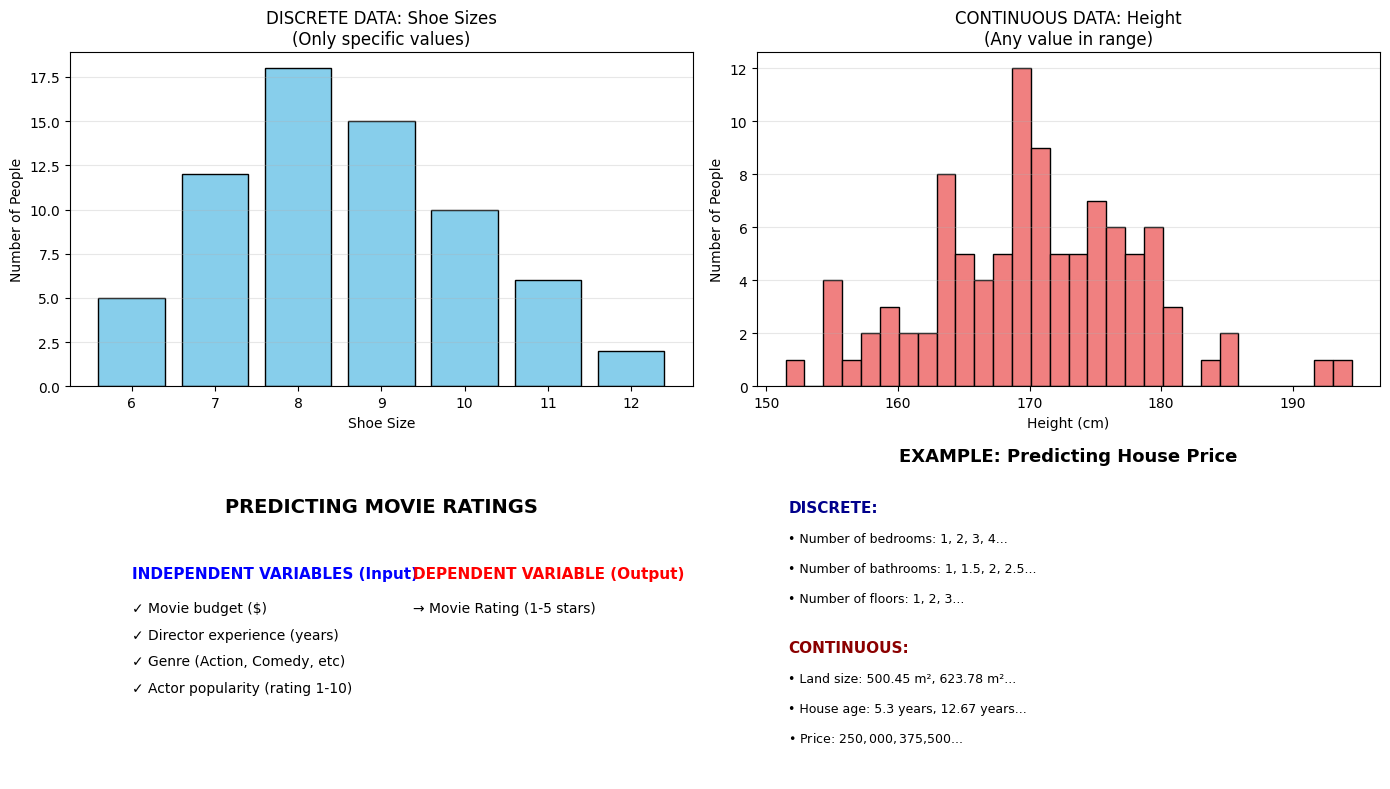

In [5]:
print("="*70)
print("DATA TERMINOLOGY")
print("="*70)

print("\n1️⃣  INDEPENDENT VARIABLES (Features/Input) 🔵")
print("   → The data we USE to make predictions")
print("   → Example: Weight, Age, Shoe Size, Income")
print("   → We 'feed' these into the model\n")

print("2️⃣  DEPENDENT VARIABLES (Target/Output) 🎯")
print("   → The data we're trying to PREDICT")
print("   → Example: Height, Price, Movie Rating")
print("   → This is what we want to predict\n")

print("3️⃣  DISCRETE DATA 📊")
print("   → Countable, specific values only")
print("   → Examples:")
print("      • Number of people in a room: 5, 10, 20 (not 5.3)")
print("      • Shoe sizes: 8, 8.5, 9 (specific options)")
print("      • Grades: A, B, C (categories)\n")

print("4️⃣  CONTINUOUS DATA 📏")
print("   → Measurable, can be ANY value in a range")
print("   → Examples:")
print("      • Height: 172.45 cm, 175.89 cm (infinite precision)")
print("      • Temperature: 23.1°C, 23.15°C, 23.156°C")
print("      • Time: Limited only by measuring tool precision\n")

# Create visual examples
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Discrete example
ax1 = axes[0, 0]
shoe_sizes = [6, 7, 8, 9, 10, 11, 12]
counts = [5, 12, 18, 15, 10, 6, 2]
ax1.bar(shoe_sizes, counts, color='skyblue', edgecolor='black')
ax1.set_xlabel('Shoe Size')
ax1.set_ylabel('Number of People')
ax1.set_title('DISCRETE DATA: Shoe Sizes\n(Only specific values)')
ax1.grid(True, alpha=0.3, axis='y')

# Continuous example
ax2 = axes[0, 1]
heights = np.random.normal(170, 8, 100)
ax2.hist(heights, bins=30, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Number of People')
ax2.set_title('CONTINUOUS DATA: Height\n(Any value in range)')
ax2.grid(True, alpha=0.3, axis='y')

# Independent vs Dependent
ax3 = axes[1, 0]
ax3.axis('off')
ax3.text(0.5, 0.8, 'PREDICTING MOVIE RATINGS', ha='center', fontsize=14, weight='bold')
ax3.text(0.1, 0.6, 'INDEPENDENT VARIABLES (Input)', fontsize=11, weight='bold', color='blue')
ax3.text(0.1, 0.5, '✓ Movie budget ($)', fontsize=10)
ax3.text(0.1, 0.42, '✓ Director experience (years)', fontsize=10)
ax3.text(0.1, 0.34, '✓ Genre (Action, Comedy, etc)', fontsize=10)
ax3.text(0.1, 0.26, '✓ Actor popularity (rating 1-10)', fontsize=10)

ax3.text(0.55, 0.6, 'DEPENDENT VARIABLE (Output)', fontsize=11, weight='bold', color='red')
ax3.text(0.55, 0.5, '→ Movie Rating (1-5 stars)', fontsize=10)

# Data type examples
ax4 = axes[1, 1]
ax4.axis('off')
ax4.text(0.5, 0.95, 'EXAMPLE: Predicting House Price', ha='center', fontsize=13, weight='bold')

ax4.text(0.05, 0.80, 'DISCRETE:', fontsize=11, weight='bold', color='darkblue')
ax4.text(0.05, 0.71, '• Number of bedrooms: 1, 2, 3, 4...', fontsize=9)
ax4.text(0.05, 0.62, '• Number of bathrooms: 1, 1.5, 2, 2.5...', fontsize=9)
ax4.text(0.05, 0.53, '• Number of floors: 1, 2, 3...', fontsize=9)

ax4.text(0.05, 0.38, 'CONTINUOUS:', fontsize=11, weight='bold', color='darkred')
ax4.text(0.05, 0.29, '• Land size: 500.45 m², 623.78 m²...', fontsize=9)
ax4.text(0.05, 0.20, '• House age: 5.3 years, 12.67 years...', fontsize=9)
ax4.text(0.05, 0.11, '• Price: $250,000, $375,500...', fontsize=9)

plt.tight_layout()
plt.show()

## 6. Summary: Key Concepts from Chapter 1

Here's everything we covered:

In [6]:
print("\n" + "="*70)
print("CHAPTER 1 SUMMARY: Machine Learning Fundamentals")
print("="*70)

print("""
┌─────────────────────────────────────────────────────────────────────┐
│ 1. THE TWO MAIN GOALS OF MACHINE LEARNING                           │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│ CLASSIFICATION: Predict which CATEGORY                             │
│ • Questions: Yes/No? Cat/Dog? Like/Dislike?                        │
│ • Output: A label or class                                         │
│ • Example: Will this person like a movie?                          │
│                                                                     │
│ REGRESSION: Predict a NUMBER                                       │
│ • Questions: How much? How many? What value?                       │
│ • Output: A numeric value                                          │
│ • Example: What will their height be?                              │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│ 2. TRAINING vs TESTING DATA                                         │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│ ✗ DON'T: Evaluate model only on Training Data (false confidence)   │
│ ✓ DO: Test on NEW, unseen Testing Data                             │
│                                                                     │
│ Training Data: Teaches the model the pattern                        │
│ Testing Data: Verifies it learned the pattern, not memorized       │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│ 3. OVERFITTING: When Models Memorize Instead of Learn               │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│ PROBLEM: Complex model fits Training Data perfectly but FAILS       │
│          on Testing Data                                           │
│                                                                     │
│ ANALOGY: Memorizing practice test answers (gets 100% on practice)  │
│          but failing the real exam (different questions)           │
│                                                                     │
│ SOLUTION: Simpler models often generalize better! ✓                │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│ 4. DATA TYPES & TERMINOLOGY                                         │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│ INDEPENDENT VARIABLES (Features/Input):                            │
│   → The data you USE to make predictions                           │
│   → Inputs to the model                                            │
│                                                                     │
│ DEPENDENT VARIABLES (Target/Output):                               │
│   → The data you're trying to PREDICT                              │
│   → What the model outputs                                         │
│                                                                     │
│ DISCRETE DATA: Countable, specific values only                     │
│   → Shoe size (8, 8.5, 9), Count (5, 10, 20)                       │
│                                                                     │
│ CONTINUOUS DATA: Measurable, any value in a range                  │
│   → Height (172.45 cm), Temperature (23.156°C)                     │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

✅ KEY TAKEAWAYS:
   • ML has two main goals: Classify or Predict numbers
   • Always split data: Training (teach) + Testing (evaluate)
   • Simple models often beat complex ones (Occam's Razor)
   • Understand your data: discrete vs continuous, features vs targets
   • Beware of overfitting - the biggest threat to good models!
""")

print("="*70)


CHAPTER 1 SUMMARY: Machine Learning Fundamentals

┌─────────────────────────────────────────────────────────────────────┐
│ 1. THE TWO MAIN GOALS OF MACHINE LEARNING                           │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│ CLASSIFICATION: Predict which CATEGORY                             │
│ • Questions: Yes/No? Cat/Dog? Like/Dislike?                        │
│ • Output: A label or class                                         │
│ • Example: Will this person like a movie?                          │
│                                                                     │
│ REGRESSION: Predict a NUMBER                                       │
│ • Questions: How much? How many? What value?                       │
│ • Output: A numeric value                                          │
│ • Example: What will their height be?                              │
│                    